In [1]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
import shutil

# 경고 뜨지 않게...
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False
# 매직명령어 => 쥬피터노트북에서 그래프 삽입 기능 
%matplotlib inline
# 글꼴 선명화 
%config InlineBackend.figure_format = 'retina'

# 랜덤 모듈
import random

# 학습 모델 저장 및 복원
import pickle

# 딥러닝 라이브러리
import tensorflow as tf
# 신경망 모델을 관리하는 객체
from tensorflow.keras.models import Sequential
# 선형 회귀 레이어
from tensorflow.keras.layers import Dense
# 활성화 함수를 정의하는 객체
from tensorflow.keras.layers import Activation

# CNN : 커널을 통해 합성곱을 구하는 것. 이미지의 특징이 두드러 지게 한다.
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Conv1D

# MaxPooling : 커널내에서 가장 큰 값을 추출하는 방식으로 불필요한 부분을 제거한다.
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import MaxPool1D

# 1차원으로 변환하는 것
from tensorflow.keras.layers import Flatten

# Dropout : 이미자나 영상, 음파 등의 데이터는 오랫동안 학습을 진행 시켜야 한다.
# 하지만 너무 빨리 과적합이 발생되면 조기 중단 때문에 학습 횟수가 줄어들 수 있다.
# 이에 은닉의 노드를 일부 사용하지 않으므로써 과적합이 빨리 오는 것을 예방하고
# 오랫동안 학습이 가능하다.
from tensorflow.keras.layers import Dropout

# Embadding : 단어의 수를 조정한다.
from tensorflow.keras.layers import Embedding

# LSTM
from tensorflow.keras.layers import LSTM

# 원핫 인코딩을 수행하는 함수
from tensorflow.keras.utils import to_categorical

# 저장된 학습모델을 복원한다.
from tensorflow.keras.models import load_model

# 모델을 자동 저장한다.
from tensorflow.keras.callbacks import ModelCheckpoint
# 성능이 더이상 좋아지지 않을 경우 중단 시킨다.
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard

# 문장을 잘라준다.
from tensorflow.keras.preprocessing.text import Tokenizer
# 모든 문장 데이터의 단어 데이터의 수를 동일한 수로 맞춰준다.
from tensorflow.keras.preprocessing.sequence import pad_sequences
# 문자열을 가지고 단어 사전을 만들어준다.
from tensorflow.keras.preprocessing.text import text_to_word_sequence

# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 표준화
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
# 문자열 => 숫자
from sklearn.preprocessing import LabelEncoder

# 전체데이터를 학습용과 검증으로 나눈다.
from sklearn.model_selection import train_test_split

# 랜덤시드 설정
# 데이터를 랜덤하게 섞거나 가중치를 랜덤하게 설정하는 등..
# 작업에서 랜덤을 적용하는 경우가 더러 있다.
# 이에, 시드를 고정시킨다.
random_seed = 1
np.random.seed(random_seed)
random.seed(random_seed)
tf.random.set_seed(random_seed)

# 현재 프로젝트에서 GPU 메모리 사용을 필요한 만큼만 쓸 수 있도록 한다.
# 컴퓨터에 있는 GPU 정보들을 가져온다.

# gpus = tf.config.experimental.list_physical_devices('GPU')
# # gpu가 있다면...
# if len(gpus) > 0 :
#     try :
#         for gpu in gpus :
#             tf.config.experimental.set_memory_growth(gpu, True)
#     except RuntimeError as e :
#         print(e)

### 데이터를 읽어온다.

In [16]:
drink = pd.read_csv('./data/drinks.csv')
drink

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF


- county : 국가정보
- beer_servings : 맥주 소비량
- spirit_servings : 증류주 소비량
- wine_servings : 와인 소비량
- total_liters_of_pure_alcohol : 총 알콜 소비량
- contient : 대륙정보

In [17]:
drink.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB


In [18]:
# 결측치 확인
# 대륙을 뜻하는 continent에는 NA라는 단어가 있다.
# 이를 결측치로 취급한다.
drink.isna().sum()

country                          0
beer_servings                    0
spirit_servings                  0
wine_servings                    0
total_litres_of_pure_alcohol     0
continent                       23
dtype: int64

In [19]:
# 만약 csv파일에 있는 NA라는 단어를 결측치가 아닌 NA라는 글자로 인식해서 가져오고자 한다면 na_filter에 False를 넣어준다.
drink = pd.read_csv('./data/drinks.csv', na_filter=False)
drink.isna().sum()

country                         0
beer_servings                   0
spirit_servings                 0
wine_servings                   0
total_litres_of_pure_alcohol    0
continent                       0
dtype: int64

In [20]:
drink['continent'].value_counts()

AF    53
EU    45
AS    44
NA    23
OC    16
SA    12
Name: continent, dtype: int64

### 조사 대상에 대한 대륙별 비율을 확인한다.

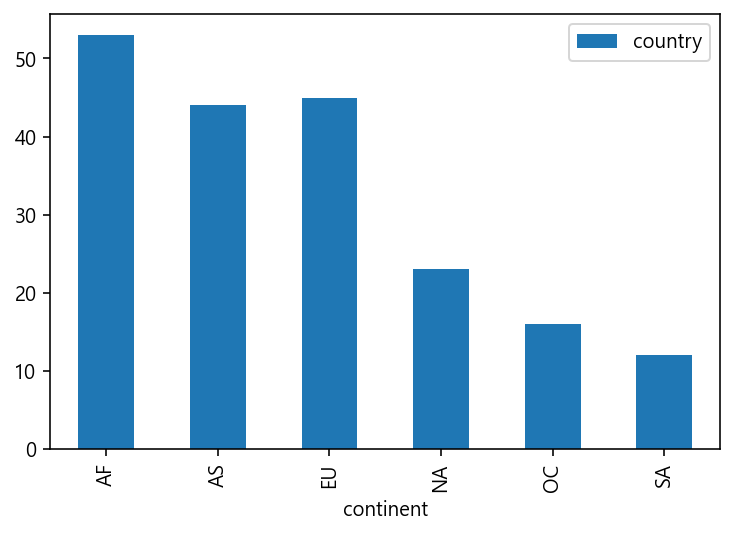

In [22]:
# 조사 대상에 대한 대륙별 국가의 수를 비교
a1 = drink[['country', 'continent']].groupby('continent').count()
a1.plot.bar()
plt.show()

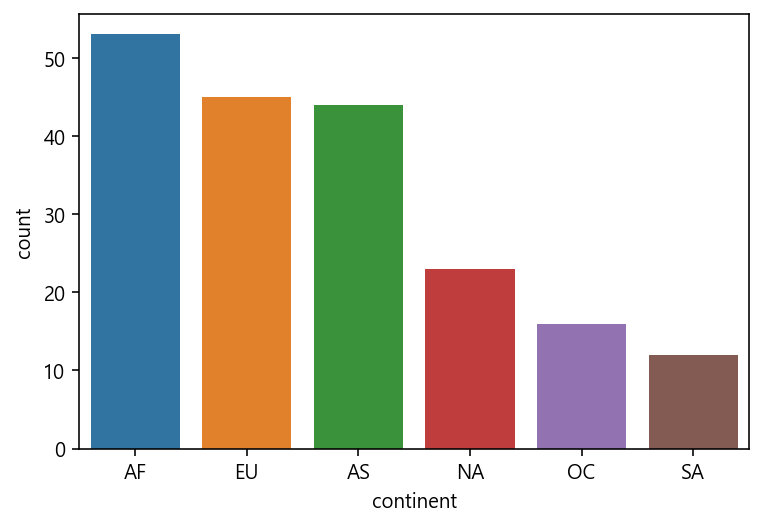

In [31]:
idx = drink['continent'].value_counts().index
sns.countplot(data=drink, x='continent', order=idx)
plt.show()

In [33]:
# 파이 그래프를 그리기 위해 데이터를 준비한다.
# 대륙별 국가 수
a1 = drink['continent'].value_counts()
a1

AF    53
EU    45
AS    44
NA    23
OC    16
SA    12
Name: continent, dtype: int64

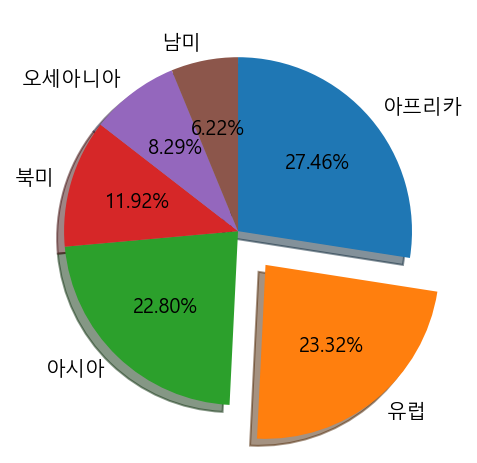

In [44]:
# 대륙이름
names = ['아프리카', '유럽', '아시아', '북미', '오세아니아', '남미']

# 첫 번째 : 데이터
# albels : 각 파이의 이름
# autopct : 파이 내에 퍼센트가 표시될 양식. 생략하면 비율이 표시 되지 않는다.</br>%.2f%% -> 소수점이하 두자리까지 표시
# shadow : True를 주면 그림자가 생긴다
# explode : 각 파이조각이 튀어나올 비율을 설정(1 : 반지름)
# startangle : 시작 각도 값. 3시방향이 0이며 시계 반대 반향으로 적용
# counterclock : 원이 그려질 방향. True(기본)는 시계 반대 방향, False는 시계 방향

ex1 = 0, 0.25, 0, 0, 0, 0

plt.pie(a1, labels=names, autopct='%.2f%%', shadow=True, explode=ex1, startangle=90, counterclock=False)
plt.show()

- 대륙별 spiti_servings의 평균, 최소, 최대, 총합을 구한다.
- 전체 평균보다 많은 알콜을(total_liters_of_pure_alcohol)을 섭취하는 대륙을 구한다.
- 평균 beer_servings가 가장 높은 대륙을 구한다.

### 대륙별 spiti_servings의 평균, 최소, 최대, 총합을 구한다.

In [147]:
a1 = drink[['continent', 'spirit_servings']].groupby('continent').describe()
a2 = drink[['continent', 'spirit_servings']].groupby('continent').sum()
display(a1)
display(a2)

spirit_servings                                                      \
                    count        mean        std   min     25%    50%     75%   
continent                                                                       
AF                   53.0   16.339623  28.102794   0.0    1.00    3.0   19.00   
AS                   44.0   60.840909  84.362160   0.0    1.00   16.0   98.00   
EU                   45.0  132.555556  77.589115   0.0   81.00  122.0  173.00   
NA                   23.0  165.739130  94.993884  68.0  101.00  137.0  190.50   
OC                   16.0   58.437500  70.504817   0.0   18.00   37.0   65.25   
SA                   12.0  114.750000  77.077440  25.0   65.75  108.5  148.75   

                  
             max  
continent         
AF         152.0  
AS         326.0  
EU         373.0  
NA         438.0  
OC         254.0  
SA         302.0

,spirit_servings
continent,
AF,866
AS,2677
EU,5965
NA,3812
OC,935
SA,1377


In [148]:
a1 = a1['spirit_servings']
a1['sum'] = a2['spirit_servings']

In [149]:
a1 = a1[['mean', 'min', 'max', 'sum']]
a1

,mean,min,max,sum
continent,,,,
AF,16.339623,0.0,152.0,866
AS,60.840909,0.0,326.0,2677
EU,132.555556,0.0,373.0,5965
NA,165.739130,68.0,438.0,3812
OC,58.437500,0.0,254.0,935
SA,114.750000,25.0,302.0,1377


---

In [150]:
# agg : 구하고자 하는 통계값들을 나열해 주면 한번에 가져온다.
# 통계함수의 이름을 문자열로 넣어준다.
a1 = drink[['continent', 'spirit_servings']]
a2 = a1.groupby('continent').agg(['mean', 'min', 'max', 'sum'])
a2

spirit_servings               
                     mean min  max   sum
continent                               
AF              16.339623   0  152   866
AS              60.840909   0  326  2677
EU             132.555556   0  373  5965
NA             165.739130  68  438  3812
OC              58.437500   0  254   935
SA             114.750000  25  302  1377

### 전체 평균보다 많은 알콜을(total_litres_of_pure_alcohol)을 섭취하는 대륙을 구한다.

In [154]:
a1 = drink[['continent', 'total_litres_of_pure_alcohol']].groupby('continent').mean()
a1

,total_litres_of_pure_alcohol
continent,
AF,3.007547
AS,2.170455
EU,8.617778
NA,5.995652
OC,3.381250
SA,6.308333


In [155]:
a2 = drink['total_litres_of_pure_alcohol'].mean()
a2

4.717098445595855

In [158]:
a1.query('total_litres_of_pure_alcohol > @a2')

,total_litres_of_pure_alcohol
continent,
EU,8.617778
NA,5.995652
SA,6.308333


In [104]:
a1[a1['total_litres_of_pure_alcohol']>a2]

,total_litres_of_pure_alcohol
continent,
EU,8.617778
NA,5.995652
SA,6.308333


---

In [160]:
# 알콜 섭취량의 전체 평균을 구한다.
total_mean = drink['total_litres_of_pure_alcohol'].mean()
total_mean

4.717098445595855

In [161]:
# 대륙별 알콜 섭취량 평균을 구한다.
a1 = drink[['continent', 'total_litres_of_pure_alcohol']]

continent_mean = a1.groupby('continent').mean()
continent_mean

,total_litres_of_pure_alcohol
continent,
AF,3.007547
AS,2.170455
EU,8.617778
NA,5.995652
OC,3.381250
SA,6.308333


In [162]:
a1 = continent_mean.query('total_litres_of_pure_alcohol > @total_mean')
a1

,total_litres_of_pure_alcohol
continent,
EU,8.617778
NA,5.995652
SA,6.308333


In [163]:
a1.index

Index(['EU', 'NA', 'SA'], dtype='object', name='continent')

### 평균 beer_servings가 가장 높은 대륙을 구한다.

In [115]:
a1 = drink[['continent', 'beer_servings']].groupby('continent').mean()
a1.sort_values(by='beer_servings',ascending=False, inplace=True)
a1

,beer_servings
continent,
EU,193.777778
SA,175.083333
NA,145.434783
OC,89.687500
AF,61.471698
AS,37.045455


In [142]:
a2 = a1.index[0]
print(f'평균 beer_servings가 가장 높은 대륙은 : {a2}')

평균 beer_servings가 가장 높은 대륙은 : EU


---

In [164]:
# 대륙별 beer_servings의 평균을 구한다.
a1 = drink[['continent', 'beer_servings']]
a2 = a1.groupby('continent').mean()
a2

,beer_servings
continent,
AF,61.471698
AS,37.045455
EU,193.777778
NA,145.434783
OC,89.687500
SA,175.083333


In [165]:
# beer_servings의 평균을 기준으로 내림차순 정렬을 한다.
a3 = a2.sort_values(by='beer_servings', ascending=False)
a3

,beer_servings
continent,
EU,193.777778
SA,175.083333
NA,145.434783
OC,89.687500
AF,61.471698
AS,37.045455


In [166]:
print(f'{a3.index[0]}')

EU


### 한국인들은 얼마나 술을 독하게 마실까...

In [168]:
# 전체 술 소비량을 구한다.
total_servings = drink['beer_servings'] + drink['spirit_servings'] + drink['wine_servings']
total_servings

0        0
1      275
2       39
3      695
4      319
      ... 
188    436
189    114
190      6
191     55
192     86
Length: 193, dtype: int64

In [171]:
# 데이터 프레임에 추가한다.
drink['total_servings'] = total_servings
drink

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,tatal_servings,total_servings
0,Afghanistan,0,0,0,0.0,AS,0,0
1,Albania,89,132,54,4.9,EU,275,275
2,Algeria,25,0,14,0.7,AF,39,39
3,Andorra,245,138,312,12.4,EU,695,695
4,Angola,217,57,45,5.9,AF,319,319
...,...,...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA,436,436
189,Vietnam,111,2,1,2.0,AS,114,114
190,Yemen,6,0,0,0.1,AS,6,6
191,Zambia,32,19,4,2.5,AF,55,55


In [174]:
# 술 소비량 대비 알콜 비율을 계산한다.
# 나누기를 수행할 때는 반드시 결과에서 결측치를 확인하세요.
a1 = drink['total_litres_of_pure_alcohol'] / drink['total_servings']
a1.isna().sum()
# 연산이 성립하지 않는 데이터는 결측치처리된다.

13

In [177]:
# 결측치는 0으로 채워준다.
a1.fillna(0, inplace=True)
a1.isna().sum()

0

In [179]:
drink['alcohol_rate'] = a1 * 100
drink

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,tatal_servings,total_servings,alcohol_rate
0,Afghanistan,0,0,0,0.0,AS,0,0,0.000000
1,Albania,89,132,54,4.9,EU,275,275,1.781818
2,Algeria,25,0,14,0.7,AF,39,39,1.794872
3,Andorra,245,138,312,12.4,EU,695,695,1.784173
4,Angola,217,57,45,5.9,AF,319,319,1.849530
...,...,...,...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA,436,436,1.766055
189,Vietnam,111,2,1,2.0,AS,114,114,1.754386
190,Yemen,6,0,0,0.1,AS,6,6,1.666667
191,Zambia,32,19,4,2.5,AF,55,55,4.545455


In [182]:
# 국가와 알콜 비율을 추출한다.
country_with_rank = drink[['country', 'alcohol_rate']]
country_with_rank

,country,alcohol_rate
0,Afghanistan,0.000000
1,Albania,1.781818
2,Algeria,1.794872
3,Andorra,1.784173
4,Angola,1.849530
...,...,...
188,Venezuela,1.766055
189,Vietnam,1.754386
190,Yemen,1.666667
191,Zambia,4.545455


In [183]:
# alcohol_rate를 기준으로 내림차순 정렬을 한다.
country_with_rank.sort_values(by='alcohol_rate', ascending=False, inplace=True)
country_with_rank

,country,alcohol_rate
63,Gambia,26.666667
153,Sierra Leone,22.333333
124,Nigeria,18.571429
179,Uganda,15.370370
142,Rwanda,15.111111
...,...,...
103,Maldives,0.000000
97,Libya,0.000000
79,Iran,0.000000
90,Kuwait,0.000000


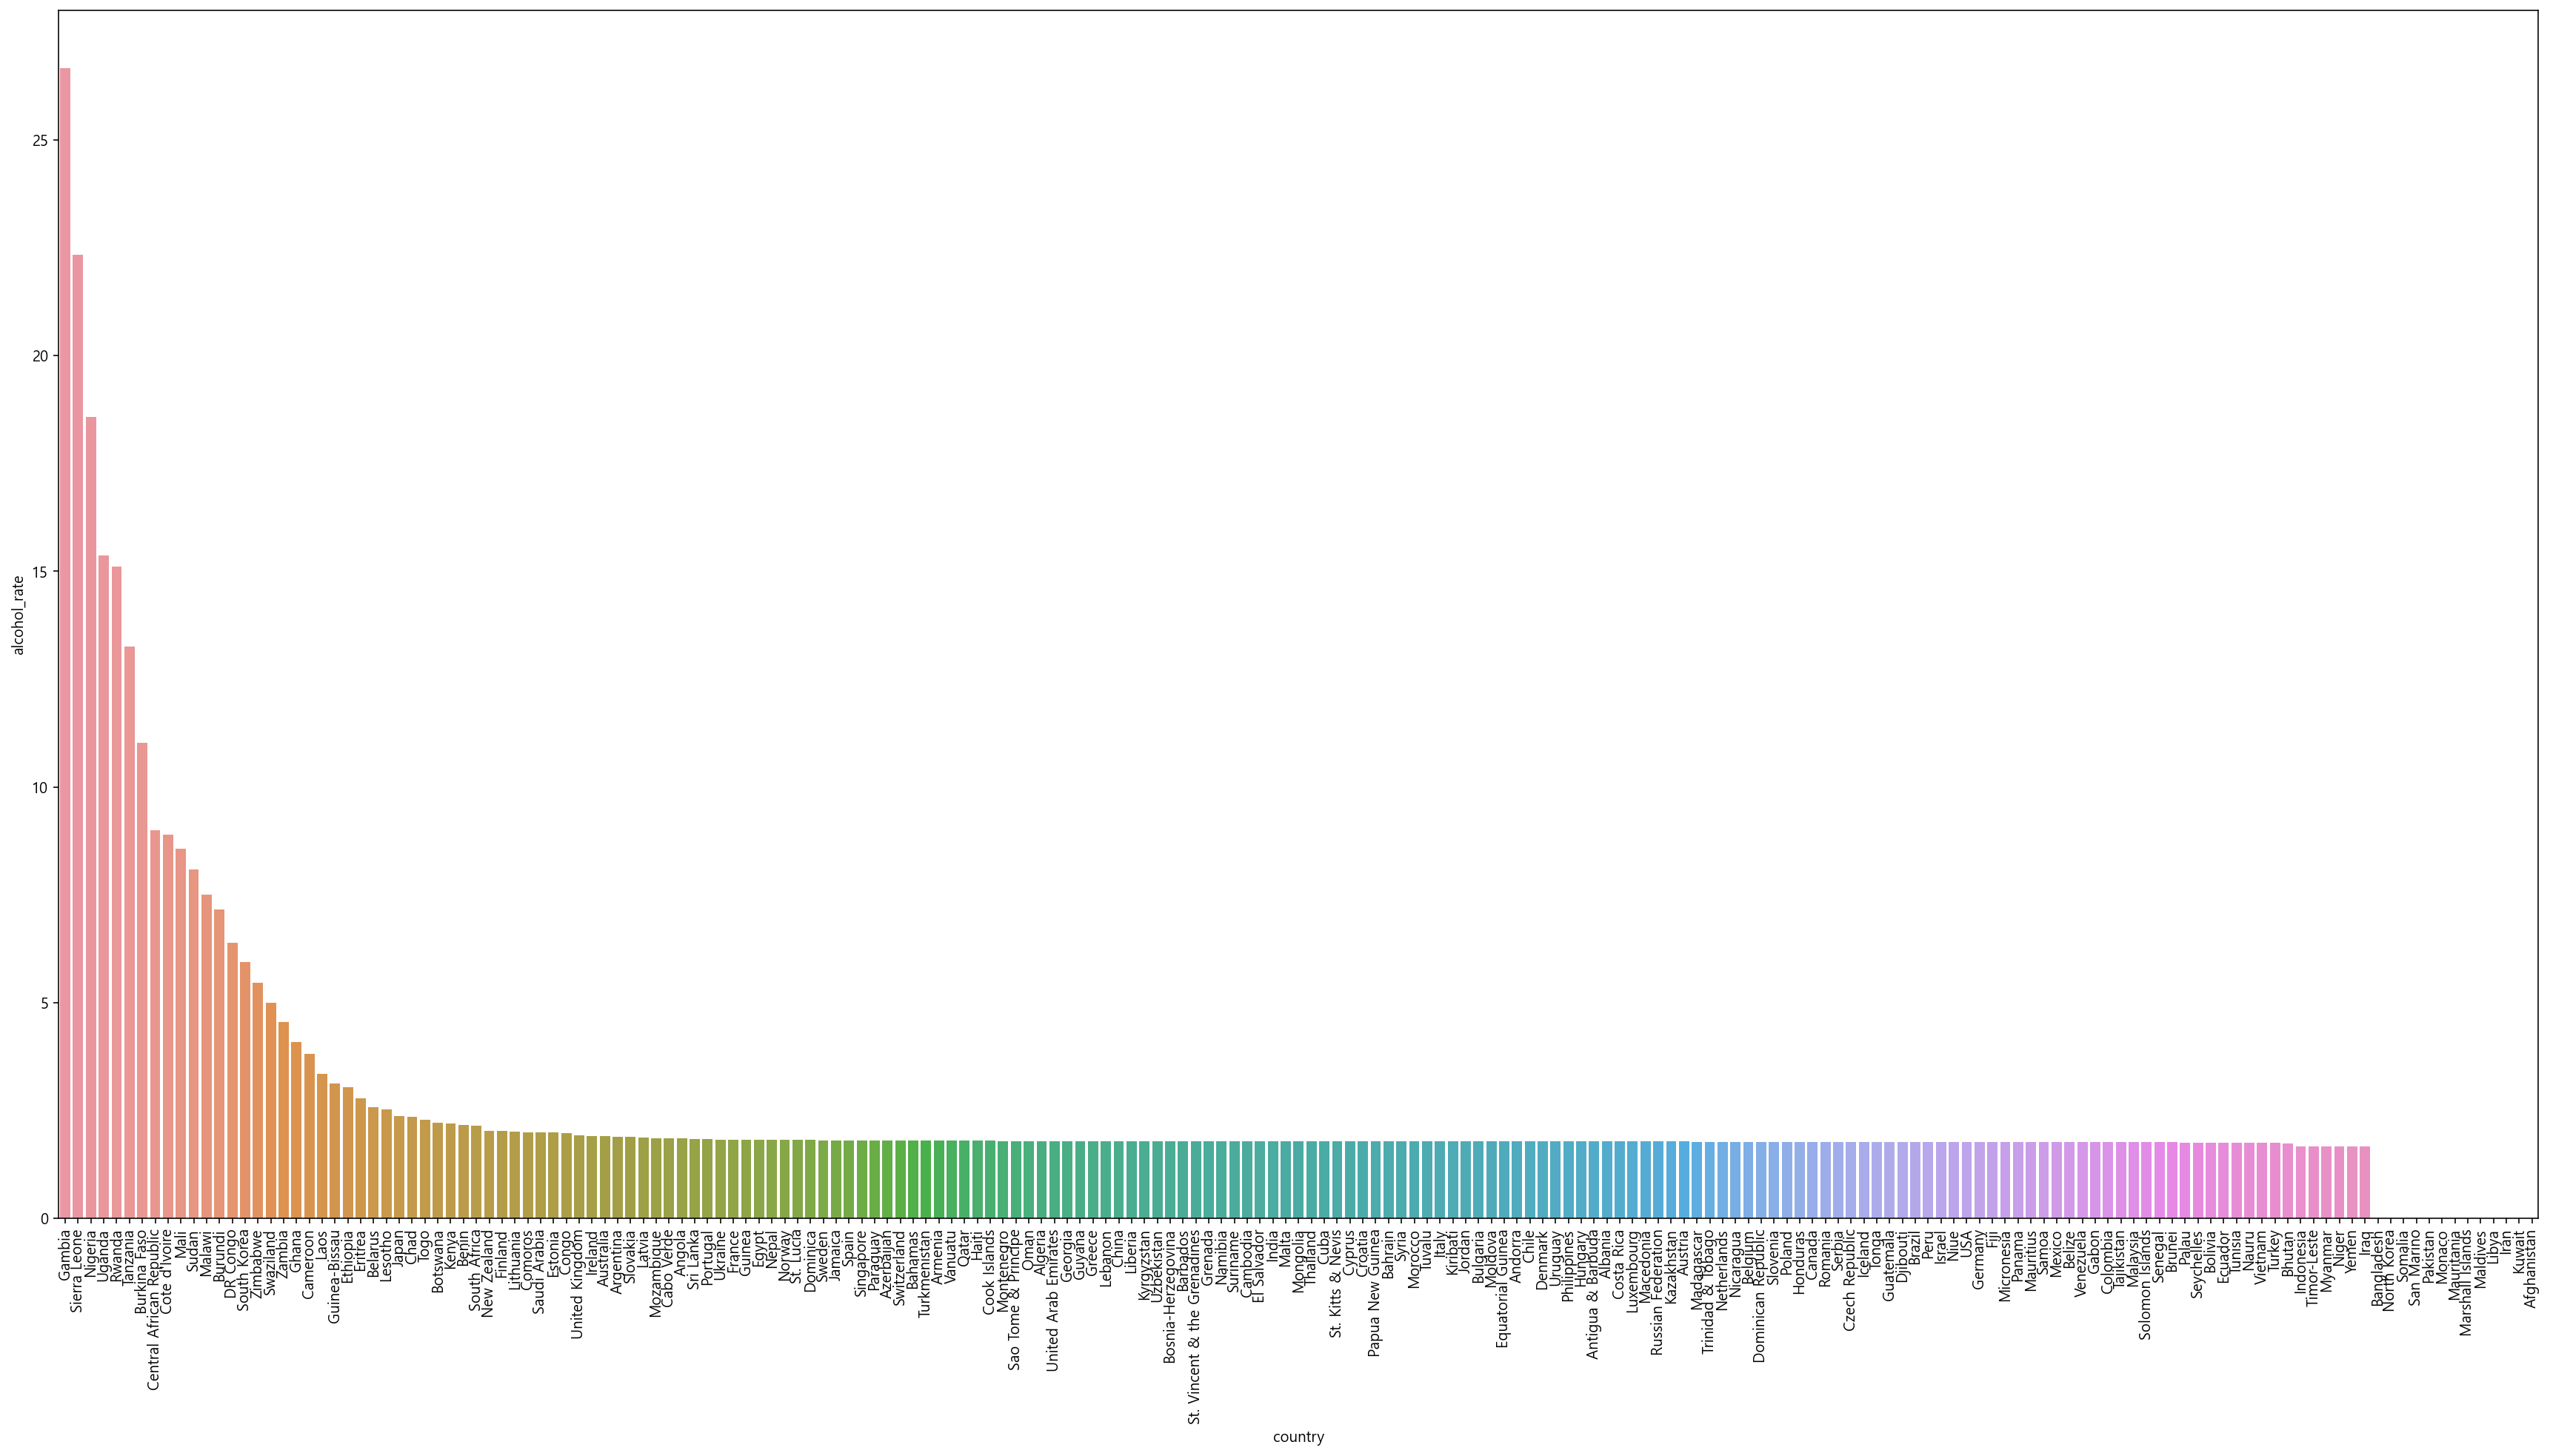

In [211]:
plt.figure(figsize=(30,15))
sns.barplot(data=country_with_rank, x='country', y='alcohol_rate')
plt.xticks(rotation=90)
plt.show()

In [188]:
# X축
# 국가의 수만큼 0부터 1씩 증가된는 것으로 설정한다.
x_pos = list(range(len(country_with_rank)))
print(x_pos)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192]


In [193]:
# y축
rank = country_with_rank['alcohol_rate'].values
rank

array([26.66666667, 22.33333333, 18.57142857, 15.37037037, 15.11111111,
       13.25581395, 11.02564103,  9.        ,  8.88888889,  8.57142857,
        8.0952381 ,  7.5       ,  7.15909091,  6.38888889,  5.93939394,
        5.46511628,  5.        ,  4.54545455,  4.09090909,  3.81578947,
        3.35135135,  3.125     ,  3.04347826,  2.77777778,  2.58527828,
        2.52252252,  2.37288136,  2.35294118,  2.28070175,  2.22222222,
        2.19512195,  2.15686275,  2.14659686,  2.03501094,  2.02839757,
        2.00622084,  2.        ,  2.        ,  1.99161426,  1.97674419,
        1.92592593,  1.91275168,  1.90825688,  1.89066059,  1.88429752,
        1.8783542 ,  1.85714286,  1.85185185,  1.84952978,  1.83333333,
        1.83333333,  1.82377049,  1.82098765,  1.81818182,  1.81818182,
        1.81818182,  1.81571816,  1.81328546,  1.81318681,  1.80904523,
        1.80851064,  1.80831826,  1.80722892,  1.80693069,  1.80555556,
        1.80530973,  1.80515759,  1.80327869,  1.80094787,  1.8 

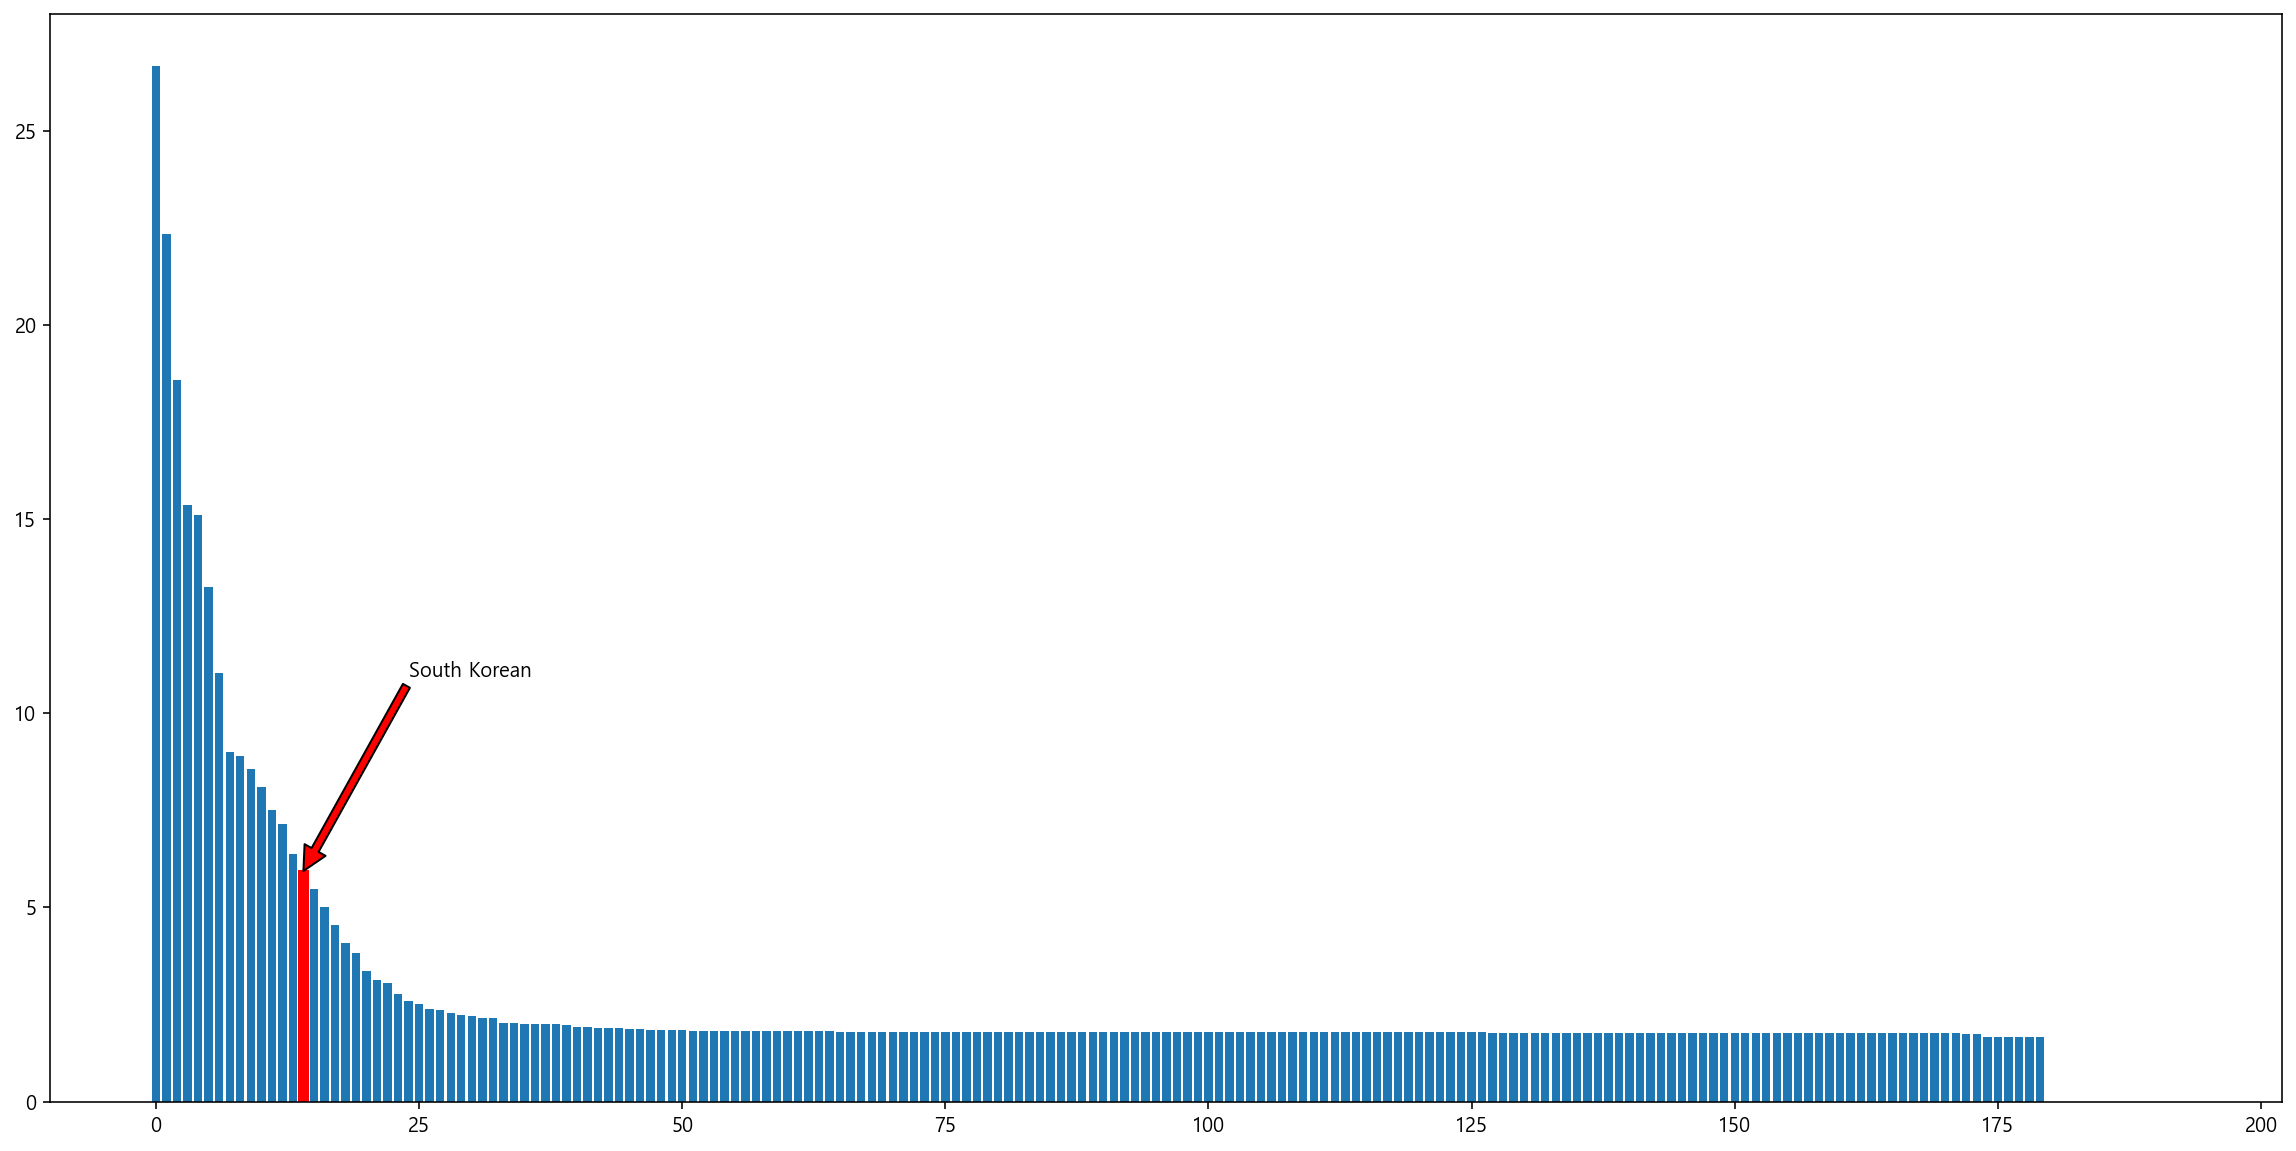

In [207]:
plt.figure(figsize=(20,10))
bar_list = plt.bar(x_pos, rank)

# 국가 이름들을 추출한다.
names = country_with_rank['country'].tolist()
# 한국이 몇 번째에 있는지 확인한다.
korean_idx = names.index('South Korea')
# print(korean_idx)
# 한국에 해당하는 막대의 색상을 붉은 색으로 변경한다.
bar_list[korean_idx].set_color('r')

# 한국 위치를 표시한다.
# 첫 번째 : 표시할 문자열
# 두 번째 : 문자열이 표시될 위치 (막대 순번, y 좌표 값)
# 세 번째 : 어노테이션의 문자열의 위치. 문자열의 위치를 바꿔주면
# 문자열과 원래의 위치사이를 화살표로 표시해준다.(막대 순번, y 좌표 값)
# 네 번째 : 화살표 옵션

arrow_dict = {
    'facecolor' : 'red'
}

plt.annotate('South Korean', xy=(korean_idx, rank[korean_idx]),
            xytext=(korean_idx+10, rank[korean_idx] + 5), arrowprops=arrow_dict)

plt.show()


In [45]:
drink

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF
